In [59]:
import pickle
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt

with open('train_resample.pickle', 'rb') as f:
    train_resample = pickle.load(f)
with open('train_norm_labels.pickle', 'rb') as f:
    train_norm_labels = pickle.load(f)
with open('exp_val_resample.pickle', 'rb') as f:
    exp = pickle.load(f)
with open('exp_val_norm_labels.pickle', 'rb') as f:
    exp_labels = pickle.load(f)
with open('exp_resample.pickle', 'rb') as f:
    exp_7 = pickle.load(f)

x = np.asarray(train_resample)
y = np.asarray(train_norm_labels)
exp_x=np.asarray(exp)
exp_y=np.asarray(exp_labels)
exp_7=np.asarray(exp_7)
size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True, test_size=size)

print(f'Shape of training data - {x_train.shape} \tShape of its labels - {y_train.shape} \nShape of testing data - {x_test.shape} \tShape of its labels') 



Shape of training data - (740, 100, 4) 	Shape of its labels - (740, 2) 
Shape of testing data - (185, 100, 4) 	Shape of its labels


In [37]:
exp_7.shape


(18, 100, 4)

# Lenanet5

In [62]:
leni_5_model = keras.models.Sequential([
    keras.layers.Conv1D(16, kernel_size=5, strides=1,  activation='relu', input_shape=(100,4), padding='same'), #C1
    keras.layers.MaxPooling1D(strides=2,padding='valid'), #S2
    keras.layers.Conv1D(32, kernel_size=4, strides=1, activation='tanh', padding='same'), #C3
    keras.layers.AveragePooling1D(padding='valid'), #S4
    keras.layers.Dense(8, activation='relu'), #C5
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(12, activation='relu'), #F6
    keras.layers.Dense(2, activation='softmax') #Output layer
])
leni_5_model.summary()

leni_5_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
leni_5_model.fit(x_train, y_train, epochs=200)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_59 (Conv1D)           (None, 100, 16)           336       
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 50, 16)            0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 50, 32)            2080      
_________________________________________________________________
average_pooling1d_4 (Average (None, 25, 32)            0         
_________________________________________________________________
dense_45 (Dense)             (None, 25, 8)             264       
_________________________________________________________________
flatten_17 (Flatten)         (None, 200)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 12)              

# 1D CNN

In [60]:
OneD_model=Sequential()


OneD_model.add(Conv1D(filters=256, kernel_size=4, activation='relu', input_shape=(100,4), padding='same'))
OneD_model.add(MaxPooling1D(pool_size=4))
OneD_model.add(Conv1D(filters=128, kernel_size=4, activation='relu', padding='same'))
OneD_model.add(MaxPooling1D(pool_size=4))
OneD_model.add(Dense(units=64, activation='relu',use_bias='False'))
OneD_model.add(Flatten())
OneD_model.add(Dense(units=2, activation='relu',use_bias='False'))
OneD_model.summary()

opt = tf.keras.optimizers.Adam(lr=0.0001)

OneD_model.compile(loss = 'mse', optimizer = opt, metrics=['Accuracy'])

# Fit the cnn_model
OneD_history = OneD_model.fit(x_train, y_train, epochs=60, verbose=1, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 100, 256)          4352      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 25, 256)           0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 25, 128)           131200    
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 6, 128)            0         
_________________________________________________________________
dense_40 (Dense)             (None, 6, 64)             8256      
_________________________________________________________________
flatten_15 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 2)               

In [ ]:
plt.close()
plt.plot(OneD_history.history['loss'], label='Training Loss')
plt.plot(OneD_history.history['val_loss'], label='Validation Loss')
plt.plot(OneD_history.history['Accuracy'], label='Training Accuracy')
plt.plot(OneD_history.history['val_Accuracy'], label='Validation Accuracy')

plt.yticks(np.arange(0, 1, 0.05))

plt.tight_layout()
plt.legend()
plt.show()

# Alexnet

In [16]:
Alex4=Sequential()

Alex4.add(Conv1D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(100,4), padding='valid'))  #C1
Alex4.add(MaxPooling1D(pool_size=3, strides= 2, padding='valid')) #S2
Alex4.add(Dropout(0.2))
Alex4.add(Conv1D(filters=256, strides=1, kernel_size=5, activation='relu', padding='same')) #C3
Alex4.add(MaxPooling1D(pool_size=3, strides=2, padding='valid')) #S4
Alex4.add(Conv1D(filters=384, strides=1, kernel_size=3, activation='relu', padding='same')) #C5
Alex4.add(Dropout(0.2))
Alex4.add(Conv1D(filters=384, strides=1, kernel_size=3, activation='relu', padding='same')) #C6
Alex4.add(Conv1D(filters=256, strides=1, kernel_size=3, activation='relu', padding='same')) #C7
Alex4.add(MaxPooling1D(pool_size=3, strides=2, padding='valid'))
Alex4.add(Flatten())
Alex4.add(Dense(units=256, activation='relu',use_bias='False')) #FC8
Alex4.add(Dense(units=64, activation='relu',use_bias='False')) #FC9
Alex4.add(Dense(units=2, activation='softmax',use_bias='False')) #FC10
Alex4.summary()

#opt = tf.keras.optimizers.Adam(lr=0.0001)

Alex4.compile(loss = 'mse', optimizer = 'adam', metrics=['Accuracy'])

# Fit the cnn_model
Alex_history = Alex4.fit(x_train, y_train, epochs=60, verbose=1, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           (None, 23, 96)            4320      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 11, 96)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 96)            0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 11, 256)           123136    
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 5, 256)            0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 5, 384)            295296    
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 384)           

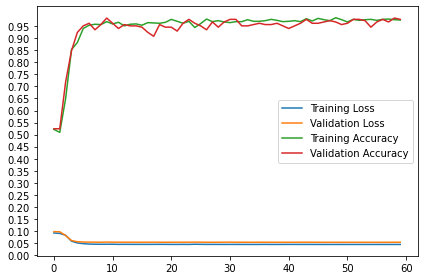

In [17]:
plt.close()
plt.plot(Alex_history.history['loss'], label='Training Loss')
plt.plot(Alex_history.history['val_loss'], label='Validation Loss')
plt.plot(Alex_history.history['Accuracy'], label='Training Accuracy')
plt.plot(Alex_history.history['val_Accuracy'], label='Validation Accuracy')

plt.yticks(np.arange(0, 1, 0.05))

plt.tight_layout()
plt.legend()
plt.show()

In [45]:
Alex4.save('Alex4.h5')

In [44]:
Alex_out=Alex4.predict(exp_x)
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.metrics import mean_absolute_error
RMSE= sqrt(mean_squared_error(exp_y,Alex_out))
print('RMSE value is:', RMSE)
babayaga=mean_absolute_error(exp_y, Alex_out)
print('MAE value is :', babayaga)



RMSE value is: 0.3264249168890933
MAE value is : 0.2835121187354215


In [57]:
Alex4.predict(exp_7)


array([[0.53630865, 0.46369132],
       [0.48869985, 0.5113001 ],
       [0.44757584, 0.5524242 ],
       [0.6065757 , 0.39342427],
       [0.44623506, 0.55376494],
       [0.6160362 , 0.3839638 ],
       [0.30004475, 0.6999552 ],
       [0.51256365, 0.4874364 ],
       [0.34661084, 0.6533891 ],
       [0.50190234, 0.4980976 ],
       [0.6880827 , 0.3119173 ],
       [0.5262209 , 0.47377908],
       [0.37470916, 0.6252908 ],
       [0.48732066, 0.51267934],
       [0.45290935, 0.5470906 ],
       [0.6056058 , 0.3943942 ],
       [0.36297977, 0.6370203 ],
       [0.59021354, 0.40978646]], dtype=float32)